In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import KMeans
import contextily as ctx
import geopandas as gpd

C:\Users\Sakshi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('Dataset .csv')

In [3]:
data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [4]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

imputer.fit(data.iloc[:,9:10].values)
data.iloc[:,9:10] = imputer.transform(data.iloc[:,9:10].values)


## Visualizing Distribution of Restaurants on World Map

In [5]:
data = data.dropna(subset=['Latitude', 'Longitude'])
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]

restaurant_map = folium.Map(location=map_center, zoom_start=12)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_18888\920907635.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


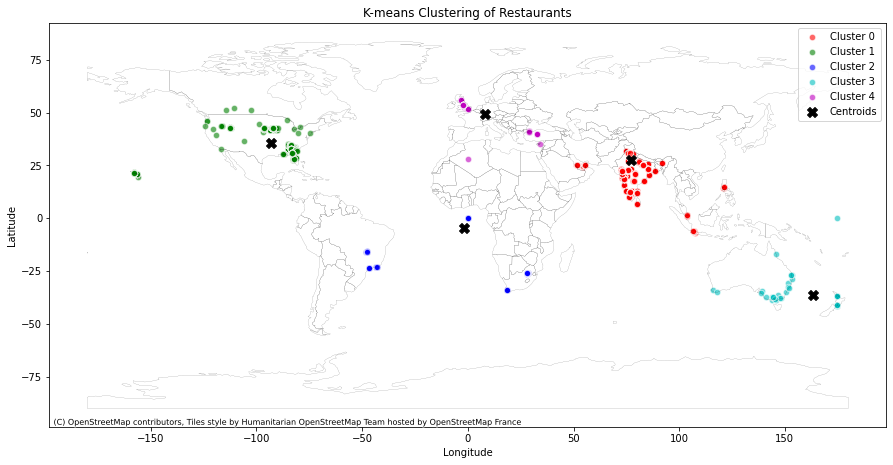

In [6]:
X = data[['Latitude', 'Longitude']]
k = 5

# Performing K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

colors = ['r', 'g', 'b', 'c', 'm']

gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting clusters
fig, ax = plt.subplots(figsize=(15, 10)) 

world.boundary.plot(ax=ax, linewidth=0.1, edgecolor='black')
for cluster_num in range(k):
    cluster_data = gdf[gdf['Cluster'] == cluster_num]
    cluster_data.plot(ax=ax, color=colors[cluster_num], label=f'Cluster {cluster_num}', markersize=40, alpha=0.6, edgecolor='w')

# Plotting centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Latitude', 'Longitude'])
centroids_gdf = gpd.GeoDataFrame(centroids, geometry=gpd.points_from_xy(centroids.Longitude, centroids.Latitude))
centroids_gdf.plot(ax=ax, color='black', label='Centroids', markersize=100, marker='X', edgecolor='k')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('K-means Clustering of Restaurants')
ax.legend()

ctx.add_basemap(ax, crs='EPSG:4326')

plt.show()

## Analyzing Concentration of Restaurants in Each City

In [7]:
grouping = data.groupby('City')
restaurant_counts = grouping['Restaurant Name'].count()

restaurant_counts = restaurant_counts.sort_values(ascending=False)


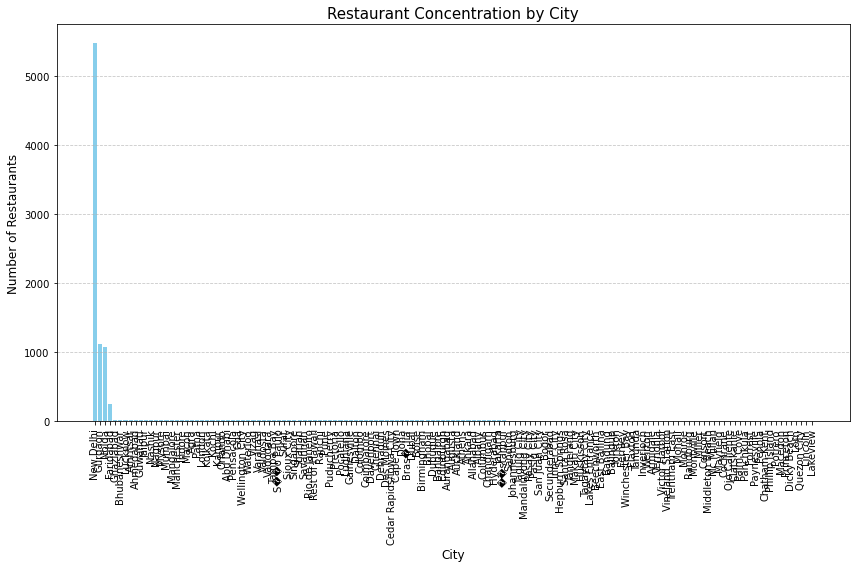

In [8]:
plt.figure(figsize=(12, 8)) 
plt.bar(restaurant_counts.index, restaurant_counts.values, color='skyblue') 
plt.xlabel('City', fontsize=12) 
plt.ylabel('Number of Restaurants', fontsize=12)  
plt.title('Restaurant Concentration by City', fontsize=15)
plt.xticks(rotation=90, fontsize=10)  
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

## Calculating Statistics - Average Ratings by City

In [9]:
average_ratings_by_city = grouping['Aggregate rating'].mean() 
print(average_ratings_by_city)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


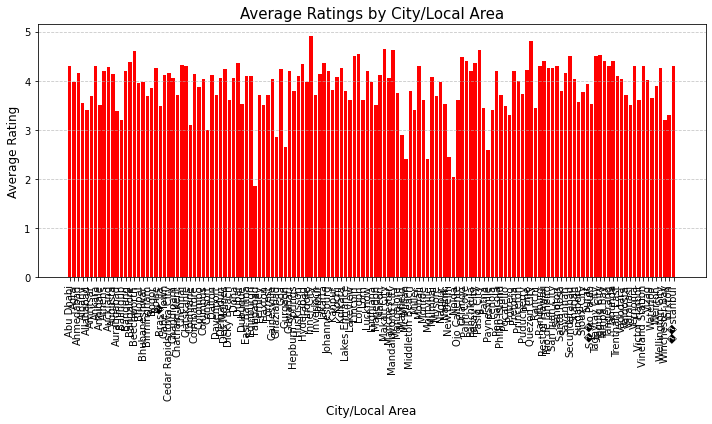

In [10]:
plt.figure(figsize=(10, 6)) 

plt.bar(average_ratings_by_city.index, average_ratings_by_city.values, color='Red') 
plt.xlabel('City/Local Area', fontsize=12) 
plt.ylabel('Average Rating', fontsize=12) 
plt.title('Average Ratings by City/Local Area', fontsize=15) 
plt.xticks(rotation=90, fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

## Calculating Statistics - Famous Cuisines by City

In [11]:
popular_cuisines_in_city = grouping['Cuisines'].agg(lambda x: x.mode().tolist()) 
print(popular_cuisines_in_city)

City
Abu Dhabi                         [American, Indian, Italian, Pizza]
Agra                                         [North Indian, Mughlai]
Ahmedabad          [Cafe, American, Continental, Armenian, Fast F...
Albany                                                [North Indian]
Allahabad                                    [North Indian, Chinese]
                                         ...                        
Weirton                                    [Burger, Greek, Sandwich]
Wellington City                                               [Cafe]
Winchester Bay                              [Burger, Seafood, Steak]
Yorkton                                                      [Asian]
��stanbul                                                     [Cafe]
Name: Cuisines, Length: 141, dtype: object


City
Abu Dhabi                         [American, Indian, Italian, Pizza]
Agra                                         [North Indian, Mughlai]
Ahmedabad          [Cafe, American, Continental, Armenian, Fast F...
Albany                                                [North Indian]
Allahabad                                    [North Indian, Chinese]
                                         ...                        
Weirton                                    [Burger, Greek, Sandwich]
Wellington City                                               [Cafe]
Winchester Bay                              [Burger, Seafood, Steak]
Yorkton                                                      [Asian]
��stanbul                                                     [Cafe]
Name: Cuisines, Length: 141, dtype: object


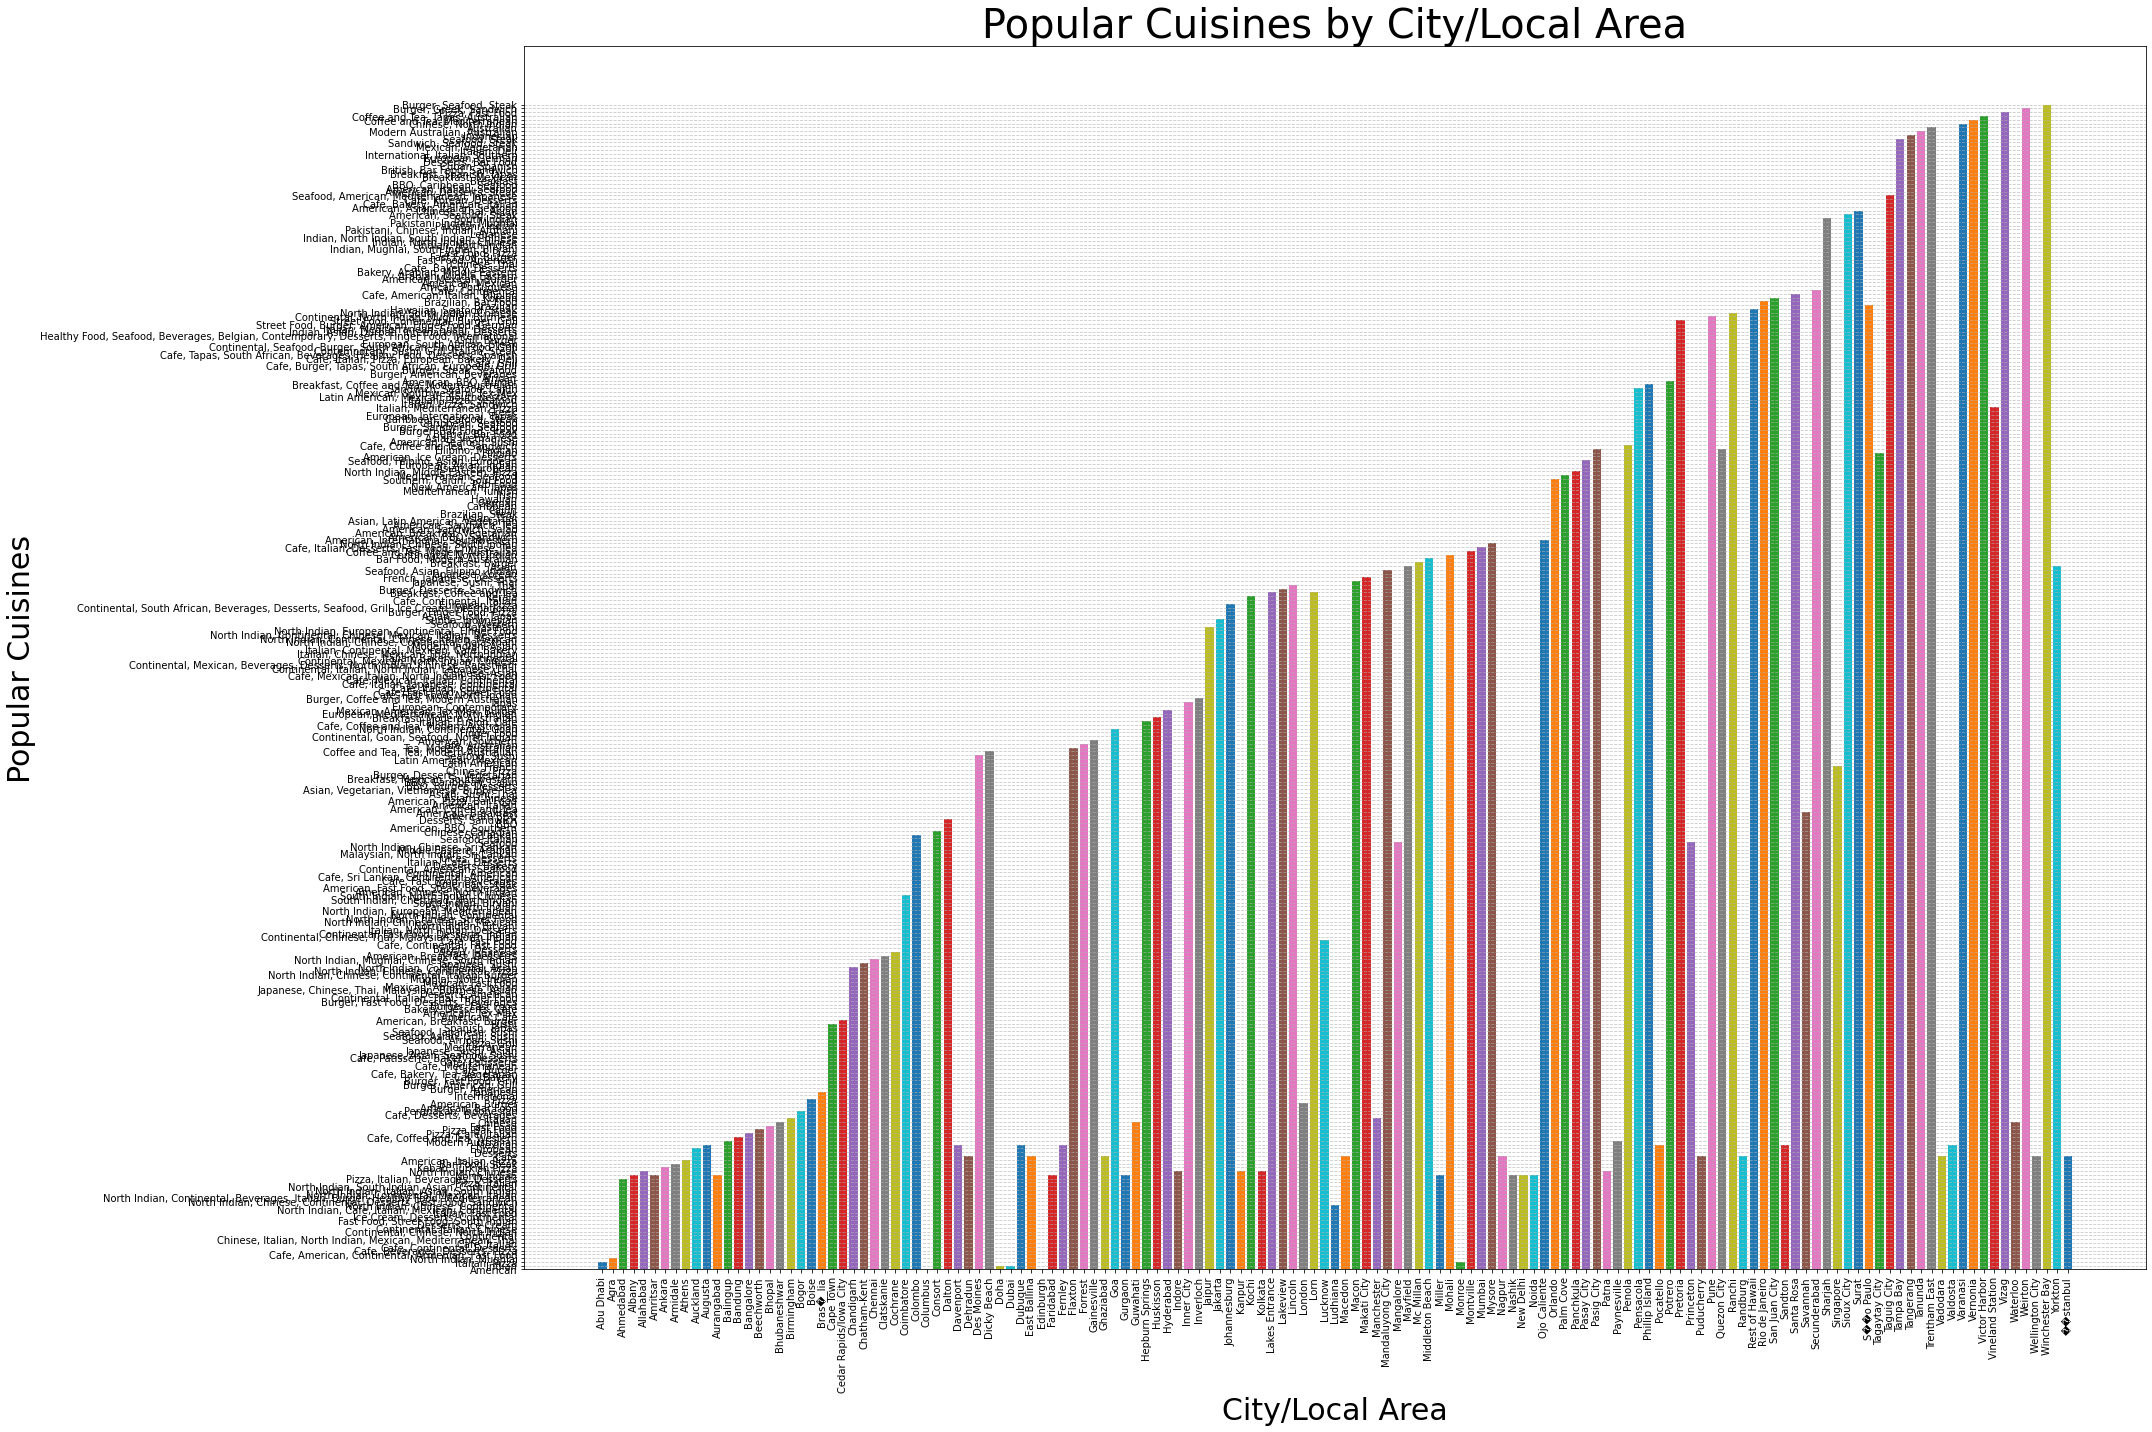

In [12]:
popular_cuisines_by_city = grouping['Cuisines'].agg(lambda x: x.mode().tolist())
print(popular_cuisines_by_city)

plt.figure(figsize=(30, 20))

for city, cuisines in popular_cuisines_by_city.items():
    plt.bar(city, cuisines) 
    plt.xlabel('City/Local Area', fontsize=30)
    plt.ylabel('Popular Cuisines', fontsize=30)
    plt.title('Popular Cuisines by City/Local Area', fontsize=40)
    plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Calculating Statistics - Price Range Analysis by City

In [13]:
price_range_by_city = grouping['Price range'].agg(lambda x: x.mode().iloc[0]) 
print(price_range_by_city)

City
Abu Dhabi          4
Agra               2
Ahmedabad          3
Albany             1
Allahabad          3
                  ..
Weirton            2
Wellington City    4
Winchester Bay     2
Yorkton            2
��stanbul          3
Name: Price range, Length: 141, dtype: int64


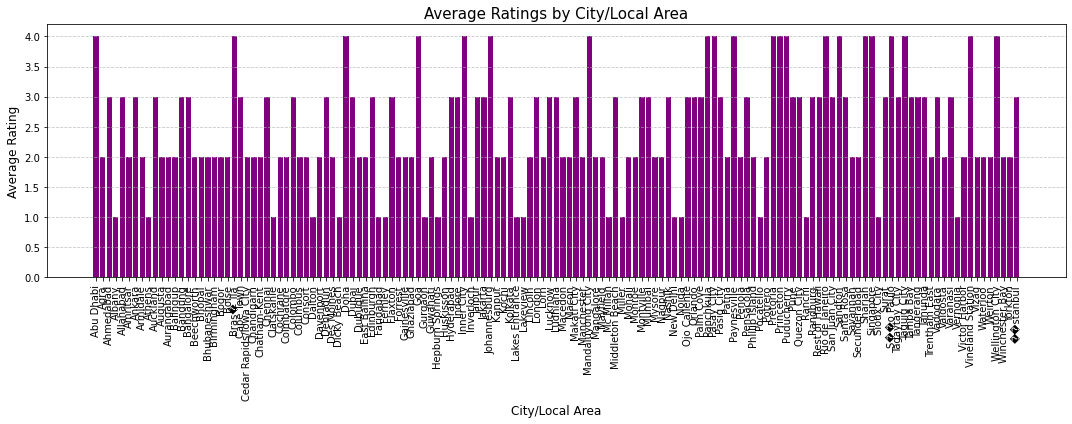

In [14]:
plt.figure(figsize=(15, 6)) 

plt.bar(price_range_by_city.index, price_range_by_city.values, color='Purple') 
plt.xlabel('City/Local Area', fontsize=12) 
plt.ylabel('Average Rating', fontsize=12) 
plt.title('Average Ratings by City/Local Area', fontsize=15) 
plt.xticks(rotation=90, fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()